In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('tips.csv')

In [3]:
#  data info
#  data['time'] = dinner,lunch as 0,1
#  data['sex'] = male,female as 0,1
#  data['smoker'] = no,yes as 0,1

In [4]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
data.isnull().sum().sum()

0

<Axes: xlabel='sex', ylabel='count'>

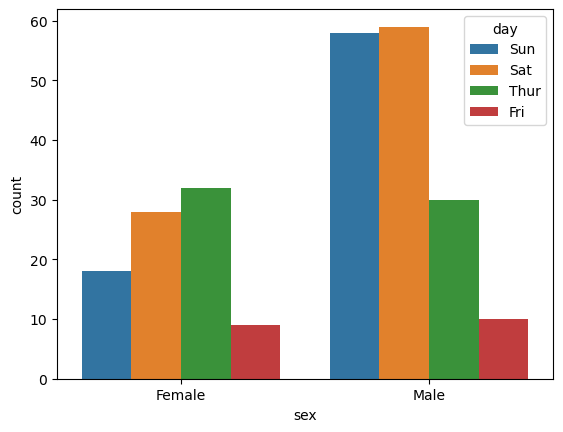

In [7]:
sns.countplot(data=data,x='sex',hue='day')

<Axes: xlabel='time', ylabel='count'>

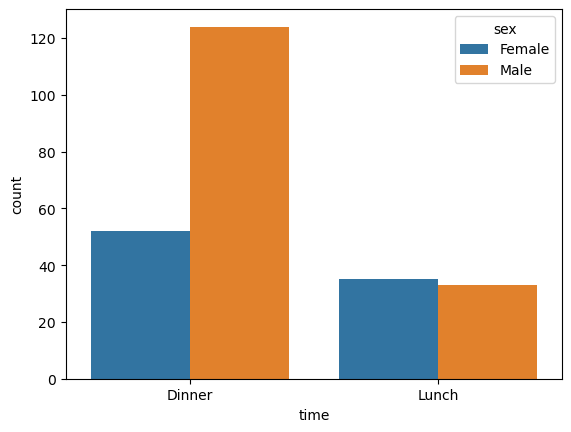

In [8]:
sns.countplot(data=data,x='time',hue='sex')

<Axes: xlabel='sex', ylabel='count'>

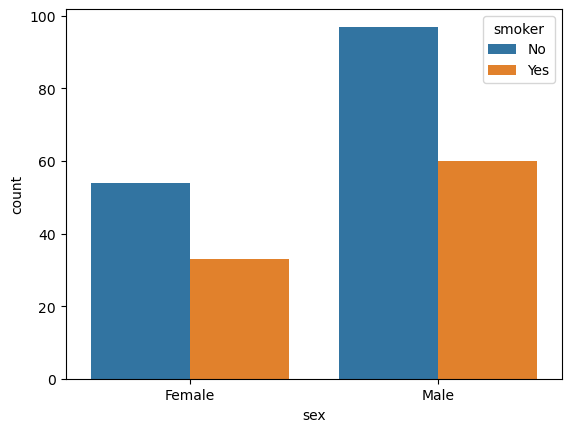

In [9]:
sns.countplot(data=data,x='sex',hue='smoker')

In [10]:
data['time'] =  data['time'].replace(['Dinner','Lunch'],[0,1])
data['sex'] = data['sex'].replace(['Male','Female'],[0,1])
data['smoker'] = data['smoker'].replace(['No','Yes'],[0,1])
data['day'] = data['day'].replace(['Sun', 'Mon','Tues','Wed','Thur', 'Fri', 'Sat',],[0,1,2,3,4,5,6])

In [11]:
data.drop('day',axis=1,inplace=True)

In [12]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [13]:
x

,total_bill,tip,sex,smoker,time
0,16.99,1.01,1,0,0
1,10.34,1.66,0,0,0
2,21.01,3.50,0,0,0
3,23.68,3.31,0,0,0
4,24.59,3.61,1,0,0
...,...,...,...,...,...
239,29.03,5.92,0,0,0
240,27.18,2.00,1,1,0
241,22.67,2.00,0,1,0
242,17.82,1.75,0,0,0


In [14]:
y

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

In [15]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((170, 5), (74, 5), (170,), (74,))

In [17]:
data

,total_bill,tip,sex,smoker,time,size
0,16.99,1.01,1,0,0,2
1,10.34,1.66,0,0,0,3
2,21.01,3.50,0,0,0,3
3,23.68,3.31,0,0,0,2
4,24.59,3.61,1,0,0,4
...,...,...,...,...,...,...
239,29.03,5.92,0,0,0,3
240,27.18,2.00,1,1,0,2
241,22.67,2.00,0,1,0,2
242,17.82,1.75,0,0,0,2


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   time        244 non-null    int64  
 5   size        244 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 11.6 KB


In [19]:
from sklearn.preprocessing import StandardScaler
Scalar = StandardScaler()

In [20]:
# X_train = Scalar.fit_transform(X_train)
# x_test = Scalar.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
lin_model = LogisticRegression()

In [22]:
lin_model.fit(X_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_test_pred = lin_model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Confusion Matrix:


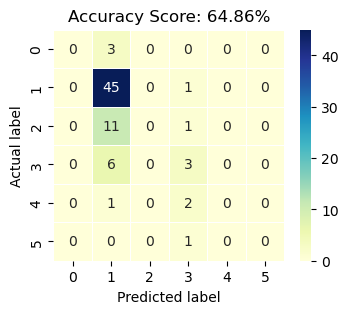


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.68      0.98      0.80        46
           3       0.00      0.00      0.00        12
           4       0.38      0.33      0.35         9
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.65        74
   macro avg       0.18      0.22      0.19        74
weighted avg       0.47      0.65      0.54        74



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#------Confusion Matrix---------
print("\nConfusion Matrix:")
plt.figure(figsize=(4,3))
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(data=cm,linewidths=.5,annot=True, square = True,cmap = 'YlGnBu',fmt='g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title_text = 'Accuracy Score: {:.2%}'.format(accuracy_score(y_test, y_test_pred))  #------Accuracy Score------
plt.title(title_text, size = 12)
plt.show()

#------Classification Report---------
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

In [26]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier()

In [27]:
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
y_test_pred = Knn.predict(X_test)


Confusion Matrix:


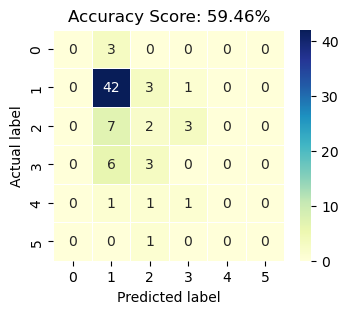


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.71      0.91      0.80        46
           3       0.20      0.17      0.18        12
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.59        74
   macro avg       0.15      0.18      0.16        74
weighted avg       0.47      0.59      0.53        74



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#------Confusion Matrix---------
print("\nConfusion Matrix:")
plt.figure(figsize=(4,3))
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(data=cm,linewidths=.5,annot=True, square = True,cmap = 'YlGnBu',fmt='g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title_text = 'Accuracy Score: {:.2%}'.format(accuracy_score(y_test, y_test_pred))  #------Accuracy Score------
plt.title(title_text, size = 12)
plt.show()

#------Classification Report---------
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

In [30]:
from sklearn.svm import SVC
svm = SVC()

In [31]:
svm.fit(X_train,y_train)

SVC()

In [32]:
y_test_pred = svm.predict(X_test)


Confusion Matrix:


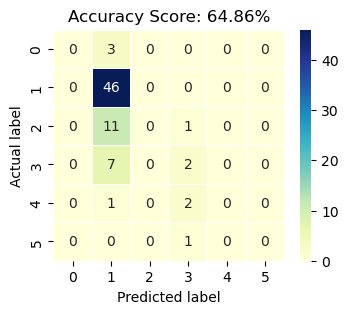


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.68      1.00      0.81        46
           3       0.00      0.00      0.00        12
           4       0.33      0.22      0.27         9
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.65        74
   macro avg       0.17      0.20      0.18        74
weighted avg       0.46      0.65      0.53        74



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#------Confusion Matrix---------
print("\nConfusion Matrix:")
plt.figure(figsize=(4,3))
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(data=cm,linewidths=.5,annot=True, square = True,cmap = 'YlGnBu',fmt='g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title_text = 'Accuracy Score: {:.2%}'.format(accuracy_score(y_test, y_test_pred))  #------Accuracy Score------
plt.title(title_text, size = 12)
plt.show()

#------Classification Report---------
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_test_pred = dtc.predict(X_test)


Confusion Matrix:


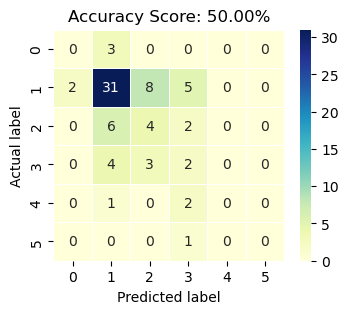


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.69      0.67      0.68        46
           3       0.27      0.33      0.30        12
           4       0.17      0.22      0.19         9
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.50        74
   macro avg       0.19      0.20      0.19        74
weighted avg       0.49      0.50      0.49        74



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
#------Confusion Matrix---------
print("\nConfusion Matrix:")
plt.figure(figsize=(4,3))
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(data=cm,linewidths=.5,annot=True, square = True,cmap = 'YlGnBu',fmt='g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title_text = 'Accuracy Score: {:.2%}'.format(accuracy_score(y_test, y_test_pred))  #------Accuracy Score------
plt.title(title_text, size = 12)
plt.show()

#------Classification Report---------
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

In [36]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train,y_train)
y_test_pred = Rfc.predict(X_test)


Confusion Matrix:


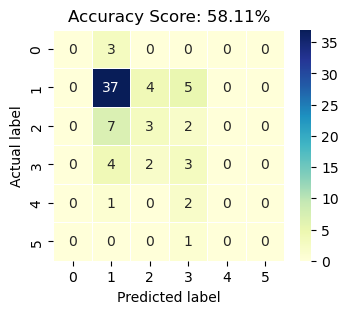


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.71      0.80      0.76        46
           3       0.33      0.25      0.29        12
           4       0.23      0.33      0.27         9
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.58        74
   macro avg       0.21      0.23      0.22        74
weighted avg       0.52      0.58      0.55        74



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
#------Confusion Matrix---------
print("\nConfusion Matrix:")
plt.figure(figsize=(4,3))
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(data=cm,linewidths=.5,annot=True, square = True,cmap = 'YlGnBu',fmt='g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title_text = 'Accuracy Score: {:.2%}'.format(accuracy_score(y_test, y_test_pred))  #------Accuracy Score------
plt.title(title_text, size = 12)
plt.show()

#------Classification Report---------
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

In [38]:
import pickle

In [39]:
# pickle.dump(lin_model,open('Tips_project.pkl','wb'))